## FoM_ParallaxHADegen ##

**2016-06-01** -- Evaluate astrometry Figure of Merit based on the "ParallaxDcrDegenMetric" 

Report the fraction of fields for which the correlation $|r| >$ 0.7 (or other chosen level). **Smaller values are better.**

There is some syntax here that constructs the file path for the input metric from user-given choices. This might not work on your setup (depending on where you put the .npz metric outputs). You can just set variable **inPath** directly to load a specific metric evaluation.

### Import modules ###

In [86]:
import numpy as np
import os

In [87]:
# the metric bundle has plot methods
import lsst.sims.maf.metricBundles as mb

In [88]:
# Can live without this entirely if not plotting
%matplotlib inline
import matplotlib.cm as cm

### Set parameters, OpSim run choice, and toplevel directory ###

In [184]:
# What level do we want?
rMaxGood = 0.70
rUnacc = 0.90

In [185]:
metricEvalDir = '/Users/clarkson/Data/LSST/OpSimRuns/opsim20160411/metricEvals'

In [186]:
# Select the choice of OpSim run we're loading
#sOpSim = 'minion_1016'
#sOpSim = 'minion_1020'
sOpSim = 'astro_lsst_01_1004'

In [187]:
# number of nights
nNight = 10000
#nNight = 730
#nNight = 365

In [188]:
# what quantity are we summing...
sMetric = 'ParallaxDcrDegenMetric'

### Load the evaluated metric bundle ###

In [189]:
# some strings to build up the run and directory

sFiltDir = 'griz'
sFiltFil = 'g_or_r_or_i_or_z_and_'

#sFiltDir = 'y'
#sFiltFil = 'y_and_'

sSQL = 'night_lt_%i' % (nNight)
sSelDir = 'nside64_%s_n%i_r21p0_lims' % (sFiltDir, nNight)

In [190]:
inputDir='%s/%s_%s' % (metricEvalDir, sOpSim, sSelDir)
inputFil='%s_%s_%s%s_HEAL.npz' % (sOpSim, sMetric, sFiltFil, sSQL)
inPath = '%s/%s' % (inputDir, inputFil)

In [191]:
if not os.access(inPath, os.R_OK):
    print "WARNING - cannot read inPath %s" % (inPath)

In [192]:
myBundle = mb.createEmptyMetricBundle()
myBundle.read(inPath)
print myBundle.metric.name

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
ParallaxDcrDegenMetric


### Compute and report the FoM ###

In [193]:
# Select on the value
vals = myBundle.metricValues
bAll = np.isfinite(vals)  # some are coming up NaN

# Do this piece by piece
bGood = (np.abs(vals) < rMaxGood)  
bBad = (np.abs(vals) < rUnacc) & (~bGood)
bUnacc = (np.abs(vals) >= rUnacc)

# sanity check
print np.sum(~vals.mask)
print np.sum(np.abs(vals) < rMaxGood)
print np.sum(  (np.abs(vals) < rMaxGood) & ~vals.mask)

nAll = np.sum(bAll)
nGood = np.sum(bGood)
nBad = np.sum(bBad)
nUnacc = np.sum(bUnacc)

31116
27426
27426


In [194]:
# Sanity check on the logic
# print nUnacc + nBad + nGood
# print nAll

In [195]:
FoM = ((nBad + nUnacc) / np.float(nAll))
print "FoM for %s:" % (inputFil)
print "--- %.3f" % (FoM)

print "FoM (nBad or nUnacc)/nTotal = %i/%i" % (nBad+nUnacc, nAll)

print nGood, nAll


FoM for astro_lsst_01_1004_ParallaxDcrDegenMetric_g_or_r_or_i_or_z_and_night_lt_10000_HEAL.npz:
--- 0.119
FoM (nBad or nUnacc)/nTotal = 3690/31116
27426 31116


In [196]:
print np.where(np.abs(myBundle.metricValues) > 0.7)[0].size
print np.where(np.abs(myBundle.metricValues) > -0.1)[0].size

3690
49152


## Sanity check - plots ##

In [197]:
# print minmax values
print "Metric values: Min %.3f, Max %.3f" \
    % (np.min(myBundle.metricValues), np.max(myBundle.metricValues))

Metric values: Min -0.907, Max 0.157


In [198]:
#cMap = cm.get_cmap('gnuplot2_r')
#cMap = cm.get_cmap('cubehelix_r')

In [199]:
# set plot parameters
thisPlotDict = {'logScale':False}# cm.RdBu_r}

#thisPlotDict['colorMin'] = 0. - rMaxGood
#thisPlotDict['colorMax'] = 0. + rMaxGood

monopole: -0.314951  dipole: lon: 116.547, lat: 71.2977, amp: 0.334735


{'Histogram': 2, 'PowerSpectrum': 3, 'SkyMap': 1}

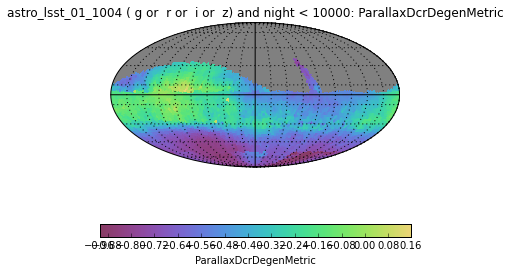

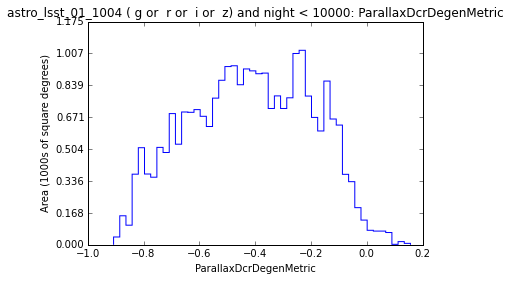

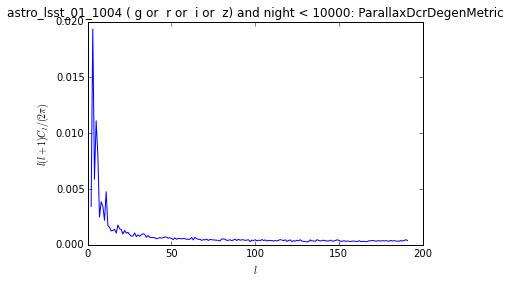

In [200]:
myBundle.setPlotDict(thisPlotDict)
myBundle.plot(savefig=True)